In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/acrima"

test  train


In [ ]:
classes_dir = ['Glaucoma_Positive', 'Glaucoma_Negative'] #total labels
drivePath = '/content/drive/MyDrive/preprocessedData/'

In [ ]:
!ls '/content/drive/MyDrive/preprocessedData/'

Train  Validation


In [ ]:
trainPath = drivePath + 'Train/'
testPath =  drivePath + 'Validation/'

In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Flatten
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import History 
history = History()

In [ ]:
trainData = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(trainPath, target_size=(224,224), classes =classes_dir)
testData = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(testPath, target_size=(224,224), classes =classes_dir)
       
# validationData = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
#        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
#        channel_shift_range=10., horizontal_flip=True).flow_from_directory('/content/valData/', target_size=(224,224), classes =classes_dir)

Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
vgg16 = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
type(vgg16)

tensorflow.python.keras.engine.functional.Functional

In [ ]:
model_vgg16 = Sequential()
for l in vgg16.layers[:-1]:
    model_vgg16.add(l)

In [ ]:
for l in model_vgg16.layers:
    l.trainable = False

In [ ]:
model_vgg16.add(Dense(2, activation='softmax'))

In [ ]:
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
model_vgg16.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [ ]:
history_vgg16 = model_vgg16.fit(trainData,validation_data=testData,epochs=40,verbose=1, callbacks=[checkpoint])

Epoch 1/40
17/17 [==============================] - 317s 18s/step - loss: 0.6849 - accuracy: 0.6782 - val_loss: 0.6265 - val_accuracy: 0.7231

Epoch 00001: accuracy improved from -inf to 0.66731, saving model to vgg16_1.h5
Epoch 2/40
17/17 [==============================] - 11s 653ms/step - loss: 0.6801 - accuracy: 0.7204 - val_loss: 0.6369 - val_accuracy: 0.6538

Epoch 00002: accuracy improved from 0.66731 to 0.73654, saving model to vgg16_1.h5
Epoch 3/40
17/17 [==============================] - 11s 657ms/step - loss: 0.5414 - accuracy: 0.7513 - val_loss: 0.6119 - val_accuracy: 0.7308

Epoch 00003: accuracy did not improve from 0.73654
Epoch 4/40
17/17 [==============================] - 11s 661ms/step - loss: 0.5464 - accuracy: 0.7313 - val_loss: 0.5658 - val_accuracy: 0.7077

Epoch 00004: accuracy improved from 0.73654 to 0.75192, saving model to vgg16_1.h5
Epoch 5/40
17/17 [==============================] - 11s 655ms/step - loss: 0.5640 - accuracy: 0.7268 - val_loss: 0.6011 - val_ac

In [ ]:
!wget https://deepblue.lib.umich.edu/data/downloads/0r967457f.zip

In [ ]:
!unzip 0r967457f

In [ ]:
!wget https://www5.cs.fau.de/fileadmin/research/datasets/fundus-images/healthy.zip

In [ ]:
!unzip healthy.zip -d valData/sanas

In [ ]:
!wget https://www5.cs.fau.de/fileadmin/research/datasets/fundus-images/glaucoma.zip

In [ ]:
!unzip glaucoma.zip -d valData/glaucoma

In [ ]:
!mkdir valData

In [ ]:
!mkdir valData/glaucoma

In [ ]:
!mkdir valData/sanas

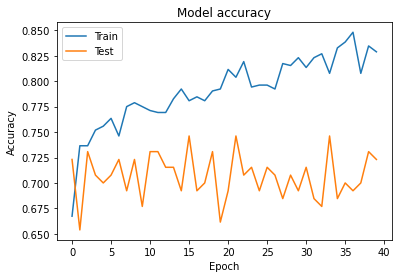

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

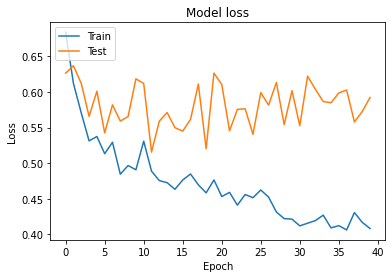

In [ ]:
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
vgg19 = keras.applications.vgg19.VGG19()

574717952/574710816 [==============================] - 4s 0us/step


In [ ]:
type(vgg19)


tensorflow.python.keras.engine.functional.Functional

In [ ]:
model_vgg19 = Sequential()
for layer in vgg19.layers[:-1]:
    model_vgg19.add(layer)

In [ ]:
for layer in model_vgg19.layers:
    layer.trainable = False

In [ ]:
model_vgg19.add(Dense(2, activation='softmax'))

In [ ]:
model_vgg19.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
model_vgg19.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_vgg19 = ModelCheckpoint("vgg19_1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [ ]:
history_vgg19 = model_vgg19.fit(trainData,validation_data=testData,epochs=40,verbose=1, callbacks=[checkpoint_vgg19])

Epoch 1/40
21/21 [==============================] - ETA: 0s - loss: 0.6489 - accuracy: 0.6352
Epoch 00001: accuracy improved from -inf to 0.63524, saving model to vgg19_1.h5
21/21 [==============================] - 15s 709ms/step - loss: 0.6489 - accuracy: 0.6352 - val_loss: 0.6208 - val_accuracy: 0.6897
Epoch 2/40
21/21 [==============================] - ETA: 0s - loss: 0.4910 - accuracy: 0.7620
Epoch 00002: accuracy improved from 0.63524 to 0.76198, saving model to vgg19_1.h5
21/21 [==============================] - 14s 681ms/step - loss: 0.4910 - accuracy: 0.7620 - val_loss: 0.5456 - val_accuracy: 0.7586
Epoch 3/40
21/21 [==============================] - ETA: 0s - loss: 0.4319 - accuracy: 0.7929
Epoch 00003: accuracy improved from 0.76198 to 0.79289, saving model to vgg19_1.h5
21/21 [==============================] - 14s 665ms/step - loss: 0.4319 - accuracy: 0.7929 - val_loss: 0.5575 - val_accuracy: 0.6897
Epoch 4/40
21/21 [==============================] - ETA: 0s - loss: 0.3921 -

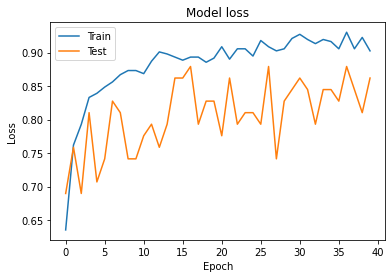

In [ ]:
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

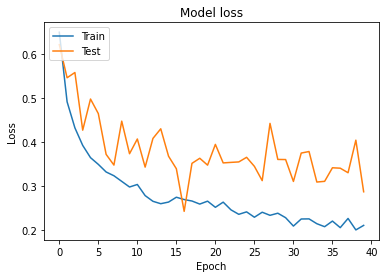

In [ ]:
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model_vgg19.save('/content/drive/My Drive/saved_model/vgg19')

INFO:tensorflow:Assets written to: /content/drive/My Drive/saved_model/vgg19/assets


In [ ]:
model_vgg16.save('/content/drive/My Drive/saved_model/vgg16')

INFO:tensorflow:Assets written to: /content/drive/My Drive/saved_model/vgg16/assets


In [ ]:
new_model = keras.models.load_model('/content/drive/My Drive/saved_model/vgg16')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
loss, acc = new_model.evaluate(testData, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 [==============================] - 0s 212ms/step - loss: 0.3033 - accuracy: 0.8966
Restored model, accuracy: 89.66%
